In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier 
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics
from sklearn import datasets
from sklearn.ensemble import ExtraTreesClassifier
%matplotlib inline

In [2]:
data =  pd.read_csv("~/Downloads/health.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6504 entries, 0 to 6503
Data columns (total 25 columns):
BIO_SEX      6503 non-null float64
HISPANIC     6481 non-null float64
WHITE        6485 non-null float64
BLACK        6485 non-null float64
NAMERICAN    6485 non-null float64
ASIAN        6485 non-null float64
age          4837 non-null float64
TREG1        6500 non-null float64
ALCEVR1      6444 non-null float64
ALCPROBS1    6504 non-null int64
marever1     6504 non-null int64
cocever1     6504 non-null int64
inhever1     6504 non-null int64
cigavail     6444 non-null float64
DEP1         6486 non-null float64
ESTEEM1      6483 non-null float64
VIOL1        6454 non-null float64
PASSIST      6504 non-null int64
DEVIANT1     6448 non-null float64
SCHCONN1     6368 non-null float64
GPA1         6274 non-null float64
EXPEL1       6486 non-null float64
FAMCONCT     6504 non-null float64
PARACTV      6477 non-null float64
PARPRES      6369 non-null float64
dtypes: float64(20), int64(5

In [3]:
## removing NA to feed to the classifier 
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4575 entries, 1 to 6502
Data columns (total 25 columns):
BIO_SEX      4575 non-null float64
HISPANIC     4575 non-null float64
WHITE        4575 non-null float64
BLACK        4575 non-null float64
NAMERICAN    4575 non-null float64
ASIAN        4575 non-null float64
age          4575 non-null float64
TREG1        4575 non-null float64
ALCEVR1      4575 non-null float64
ALCPROBS1    4575 non-null int64
marever1     4575 non-null int64
cocever1     4575 non-null int64
inhever1     4575 non-null int64
cigavail     4575 non-null float64
DEP1         4575 non-null float64
ESTEEM1      4575 non-null float64
VIOL1        4575 non-null float64
PASSIST      4575 non-null int64
DEVIANT1     4575 non-null float64
SCHCONN1     4575 non-null float64
GPA1         4575 non-null float64
EXPEL1       4575 non-null float64
FAMCONCT     4575 non-null float64
PARACTV      4575 non-null float64
PARPRES      4575 non-null float64
dtypes: float64(20), int64(5

In [4]:
## data set is a mix of explanatory variables from continuous and categorical variable 
## selecting variale of interest 
clean = ['BIO_SEX','HISPANIC','WHITE','BLACK','NAMERICAN','ASIAN','age','ALCEVR1','ALCPROBS1','marever1','cocever1'
        ,'inhever1','cigavail','DEP1','ESTEEM1','VIOL1','PASSIST','DEVIANT1',
        'SCHCONN1','GPA1','EXPEL1','FAMCONCT','PARACTV','PARPRES']

In [5]:
## segregating the predictors 
data_p = data[clean]

In [6]:
## segregrating the target or reponse variable 
data_t = data.TREG1

In [7]:
## divining trainin and test sample using train_test_split function of crossvalidation class 

pred_train,pred_test,tar_train,tar_test = train_test_split(data_p,data_t,test_size=.4)

In [8]:
## checking shape of the result

pred_train.shape,pred_test.shape,tar_train.shape,tar_test.shape

((2745, 24), (1830, 24), (2745,), (1830,))

In [9]:
## now using the classifier 
random_f = RandomForestClassifier(n_estimators=25)

In [10]:
classifier = random_f.fit(pred_train,tar_train)
prediction = classifier.predict(pred_test)

In [11]:
print 'The confusion matrix is '
sklearn.metrics.confusion_matrix(tar_test,prediction)

The confusion matrix is 


array([[1425,   64],
       [ 230,  111]])

In [12]:
print 'The accuracy is  ',sklearn.metrics.accuracy_score(tar_test,prediction)

The accuracy is   0.839344262295


In [13]:
print (random_f.feature_importances_)

[ 0.0135338   0.0098056   0.02490613  0.01141135  0.00397821  0.00303955
  0.08244924  0.0307618   0.05436835  0.10035807  0.01424336  0.0119224
  0.01950309  0.07426495  0.06603531  0.0480719   0.00920254  0.09315929
  0.07173559  0.07510348  0.00629059  0.07221224  0.05925989  0.04438325]


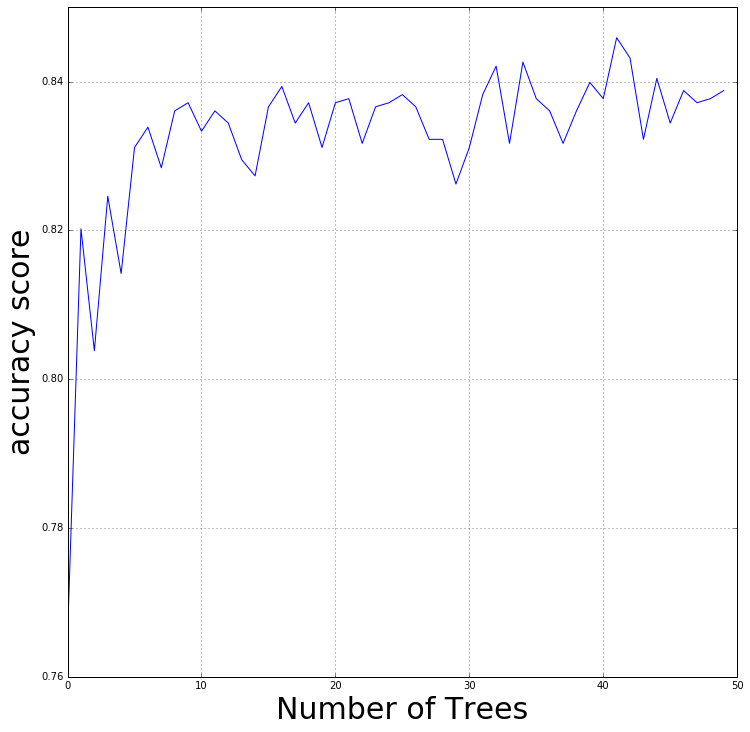

In [14]:
plt.figure(figsize=(12,12)).add_subplot(111)
trees=range(50)
accuracy=np.zeros(50)

for idx in range(len(trees)):
   classifier=RandomForestClassifier(n_estimators=idx + 1)
   classifier=classifier.fit(pred_train,tar_train)
   predictions=classifier.predict(pred_test)
   accuracy[idx]=sklearn.metrics.accuracy_score(tar_test, predictions)
   
plt.cla()

plt.plot(trees, accuracy)
plt.xlabel('Number of Trees',fontsize=30)
plt.ylabel('accuracy score',fontsize=30)
plt.grid()

# Observation : This means that increasing the number of trees doesn't have much impact on accuracy . Ideal though is 20